In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import os
import sqlite3
from pathlib import Path

In [2]:
# Prevent extra DB creations.
# Check to if the provider_info.db file exists in the resources folder. If it does, delete it.
if os.path.exists('Data/provider_info.db'):
    os.remove('Data/provider_info.db')
else:
    print("The file does not exist.")

The file does not exist.


In [3]:
# import the new CSV file "NH_ProviderInfo_Aug2024.csv" from the sample_data folder into a sqlite database.
# Create a connection to the sqlite database, and create the new .db file in the resources folder.
conn = sqlite3.connect('Data/provider_info.db')

In [4]:
# Use the newly created SQL Database connection to import the new CSV file into the database.
csv_file = 'Data/NH_ProviderInfo_Aug2024.csv'
provider_info = pd.read_csv(csv_file)

In [5]:
# Save the dataframe to an SQLite table named 'nursinghomedata'
provider_info.to_sql('nursinghomedata', conn, if_exists='replace', index=False)

14825

In [6]:
# Display the first 5 rows of the data from the sqlite database
query = 'SELECT * FROM nursinghomedata'
alldata = pd.read_sql(query, conn)
alldata.head()

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude,Geocoding Footnote,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,...,NaN,2,24644.14,0,2,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",34.5149,-87.736,NaN,2024-08-01
1,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2562495604,600,Talladega,For profit - Corporation,...,0.0,0,0.00,0,0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",33.1637,-86.254,NaN,2024-08-01
2,015012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,2562183708,350,Jackson,Government - County,...,NaN,0,0.00,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",34.6611,-86.047,NaN,2024-08-01
3,015014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206,2058330146,360,Jefferson,For profit - Individual,...,0.0,0,0.00,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",33.5595,-86.722,NaN,2024-08-01
4,015015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111,2054776161,360,Jefferson,For profit - Individual,...,NaN,0,0.00,0,0,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",33.3221,-87.034,NaN,2024-08-01


In [7]:
# Run a SQL query to find the list of columns in the database
conn = sqlite3.connect('Data/provider_info.db')
query = 'PRAGMA table_info(nursinghomedata)'
columns = pd.read_sql(query, conn)
print(columns)

     cid                            name  type  notnull dflt_value  pk
0      0  CMS Certification Number (CCN)  TEXT        0       None   0
1      1                   Provider Name  TEXT        0       None   0
2      2                Provider Address  TEXT        0       None   0
3      3                       City/Town  TEXT        0       None   0
4      4                           State  TEXT        0       None   0
..   ...                             ...   ...      ...        ...  ..
98    98                        Location  TEXT        0       None   0
99    99                        Latitude  REAL        0       None   0
100  100                       Longitude  REAL        0       None   0
101  101              Geocoding Footnote  REAL        0       None   0
102  102                 Processing Date  TEXT        0       None   0

[103 rows x 6 columns]


In [8]:
# Run a sample SQL query
query = """
SELECT
    "Overall Rating",
    "Ownership Type",
    "Provider Type",
    "Number of Certified Beds",
    "Average Number of Residents per Day",
    "Reported Total Nurse Staffing Hours per Resident per Day",
    "Health Inspection Rating",
    "Number of Substantiated Complaints",
    "Number of Fines",
    "Total Amount of Fines in Dollars",
    "County/Parish",
    "Total Number of Penalties"
FROM
    nursinghomedata
"""
# Run the query and fetch the result
df_clean = pd.read_sql(query, conn)

# Handling missing values
df_clean = df_clean.dropna()

# Print the result
df_clean.head()

,Overall Rating,Ownership Type,Provider Type,Number of Certified Beds,Average Number of Residents per Day,Reported Total Nurse Staffing Hours per Resident per Day,Health Inspection Rating,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,County/Parish,Total Number of Penalties
0,2.0,For profit - Corporation,Medicare and Medicaid,57,50.0,4.37137,2.0,0,2,24644.14,Franklin,2
1,4.0,For profit - Corporation,Medicare and Medicaid,85,76.9,4.25182,4.0,0,0,0.00,Talladega,0
2,4.0,Government - County,Medicare and Medicaid,50,45.1,4.59373,4.0,0,0,0.00,Jackson,0
3,2.0,For profit - Individual,Medicare and Medicaid,92,76.9,3.01781,3.0,0,0,0.00,Jefferson,0
4,2.0,For profit - Individual,Medicare and Medicaid,103,86.6,3.49256,2.0,1,0,0.00,Jefferson,0


In [9]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Ownership Type', 'Provider Type', 'County/Parish']

for col in categorical_columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

In [10]:
# Defining the features (X) and target (y)
X = df_clean.drop('Overall Rating', axis=1)
y = df_clean['Overall Rating']

In [11]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
#Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [17]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [18]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3", "Actual 4"],
    columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [19]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 0,527,130,12,2,0
Actual 1,166,329,119,19,0
Actual 2,17,123,262,101,22
Actual 3,0,10,138,232,110
Actual 4,0,0,15,150,396


Accuracy Score : 0.60625
Classification Report
              precision    recall  f1-score   support

         1.0       0.74      0.79      0.76       671
         2.0       0.56      0.52      0.54       633
         3.0       0.48      0.50      0.49       525
         4.0       0.46      0.47      0.47       490
         5.0       0.75      0.71      0.73       561

    accuracy                           0.61      2880
   macro avg       0.60      0.60      0.60      2880
weighted avg       0.61      0.61      0.61      2880



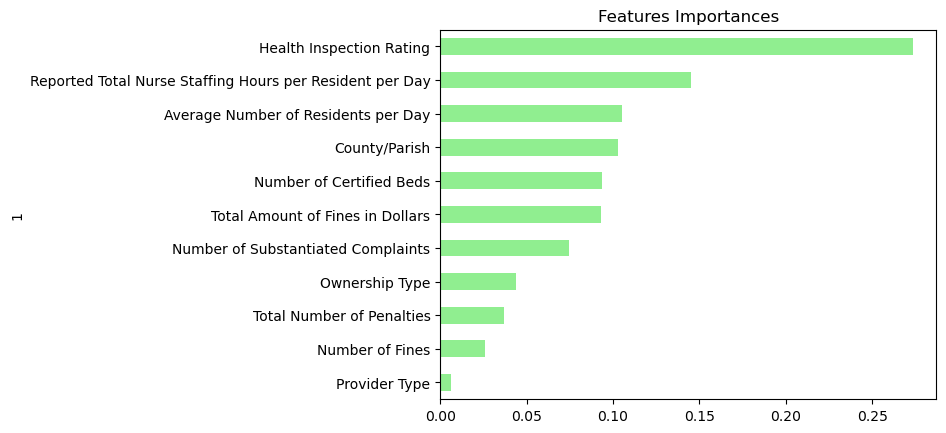

In [20]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_plot = importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
fig = importances_plot.get_figure()  # Get the figure from the Axes object
fig.savefig(os.path.join("Pictures", 'features_importance.png'), bbox_inches='tight')

In [21]:
# Look at 'Overall Rating' value counts to identify binning options
print(df_clean['Overall Rating'].value_counts())

Overall Rating
1.0    3326
2.0    3091
3.0    2794
5.0    2714
4.0    2475
Name: count, dtype: int64


In [22]:
# Merged 2, 3, and 4 into one for ease of assessment of "other categories".

df_clean['Overall Rating'] = df_clean['Overall Rating'].replace([2, 4], 3)

df_clean['Overall Rating'].value_counts()

Overall Rating
3.0    8360
1.0    3326
5.0    2714
Name: count, dtype: int64

In [23]:
# Defining the features (X) and target (y)
X = df_clean.drop('Overall Rating', axis=1)
y = df_clean['Overall Rating']

In [24]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [29]:
#Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [30]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [31]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2"],
    columns=["Predicted 0", "Predicted 1", "Predicted 2"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [32]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2
Actual 0,496,175,0
Actual 1,131,1431,86
Actual 2,0,204,357


Accuracy Score : 0.7930555555555555
Classification Report
              precision    recall  f1-score   support

         1.0       0.79      0.74      0.76       671
         3.0       0.79      0.87      0.83      1648
         5.0       0.81      0.64      0.71       561

    accuracy                           0.79      2880
   macro avg       0.80      0.75      0.77      2880
weighted avg       0.79      0.79      0.79      2880



In [33]:
# Close the connection
conn.close()